### NaN checks

In [1]:
import pandas as pd

df = pd.read_csv('/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/yeast_master_matrix_sgd.csv', sep='\t', index_col=0, header=0)

In [2]:
nan_counts = df.isna().sum(axis=1)  # Count NaNs in each row
nan_counts = nan_counts[nan_counts > 0]  # Filter rows with at least one NaN

### Median Check HS vs TF

#### Plot

/tmp/ipykernel_370489/2927517442.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Normalization Factor", data=df, palette=["#4878d0", "#e07b39", "#6aaf48"])


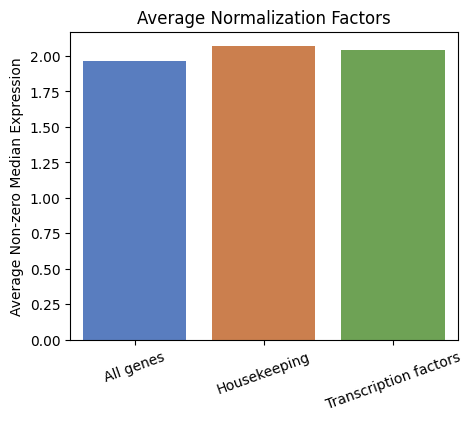

[1.9624299387156348, 2.067969701835034, 2.03787427434336]


In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load normalization factors (dictionary: {gene_id: normalization_factor})
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/updated_yeast_median_dict.pkl", "rb") as f:
    normalization_factors = pickle.load(f)

# Load housekeeping gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/hk_genes.pkl", "rb") as f:
    housekeeping_genes = pickle.load(f)

# Load transcription factor IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/tf_genes.pkl", "rb") as f:
    transcription_factors = pickle.load(f)

# Extract normalization values for each group
all_values = list(normalization_factors.values())
housekeeping_values = [normalization_factors[gene] for gene in housekeeping_genes if gene in normalization_factors]
tf_values = [normalization_factors[gene] for gene in transcription_factors if gene in normalization_factors]

# Create a dataframe for seaborn
df = pd.DataFrame({
    "Normalization Factor": [np.mean(all_values), np.mean(housekeeping_values), np.mean(tf_values)],
    "Category": ["All genes", "Housekeeping", "Transcription factors"]
})

# Plot barplot
plt.figure(figsize=(5, 4))
sns.barplot(x="Category", y="Normalization Factor", data=df, palette=["#4878d0", "#e07b39", "#6aaf48"])

plt.xlabel("")
plt.ylabel("Average Non-zero Median Expression")
plt.title("Average Normalization Factors")
plt.xticks(rotation=20)

plt.show()

print([np.mean(all_values), np.mean(housekeeping_values), np.mean(tf_values)])

#### Statistical Significance

Observed mean for housekeeping genes: 2.067969701835034
P-value: 0.0012


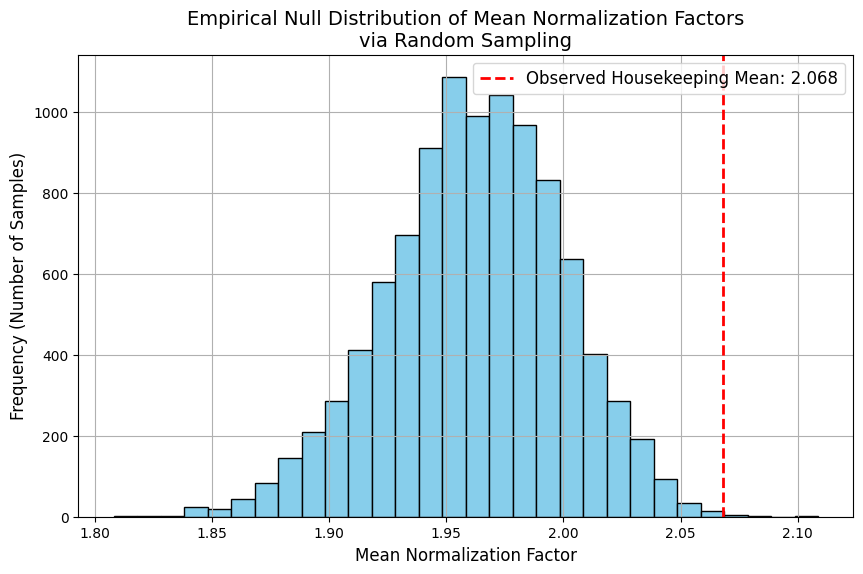

In [5]:
import random
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load normalization factors (dictionary: {gene_id: normalization_factor})
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/updated_yeast_median_dict.pkl", "rb") as f:
    gene_median_nonzero_dict = pickle.load(f)

# Load housekeeping gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/hk_genes.pkl", "rb") as f:
    housekeeping_genes = pickle.load(f)

# Filter housekeeping genes that exist in the normalization factors dictionary
hk_values = [gene_median_nonzero_dict[gene] for gene in housekeeping_genes if gene in gene_median_nonzero_dict]
n = len(hk_values)

if n == 0:
    print("No housekeeping gene values found in the normalization factors dictionary.")
else:
    # Compute the observed mean for housekeeping genes
    observed_mean = np.mean(hk_values)
    
    # Set number of permutations
    mcmax = 9999
    mean_array = np.zeros(mcmax)
    all_genes = list(gene_median_nonzero_dict.keys())

    # Perform sampling and compute the mean for each random sample
    for i in range(mcmax):
        sampled_keys = random.sample(all_genes, n)
        sampled_values = [gene_median_nonzero_dict[k] for k in sampled_keys]
        mean_array[i] = np.mean(sampled_values)

    # Calculate the p-value (non-parametric)
    p_value = (np.sum(mean_array >= observed_mean) + 1) / (mcmax + 1)
    print(f"Observed mean for housekeeping genes: {observed_mean}")
    print(f"P-value: {p_value}")

    # Plot histogram of the permutation distribution and mark the observed mean
    plt.figure(figsize=(10, 6))
    plt.hist(mean_array, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(observed_mean, color='red', linestyle='dashed', linewidth=2,
                label=f'Observed Housekeeping Mean: {observed_mean:.3f}')
    plt.title('Empirical Null Distribution of Mean Normalization Factors\nvia Random Sampling', fontsize=14)
    plt.xlabel('Mean Normalization Factor', fontsize=12)
    plt.ylabel('Frequency (Number of Samples)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

Observed mean for transcription factors: 2.03787427434336
P-value: 0.0001


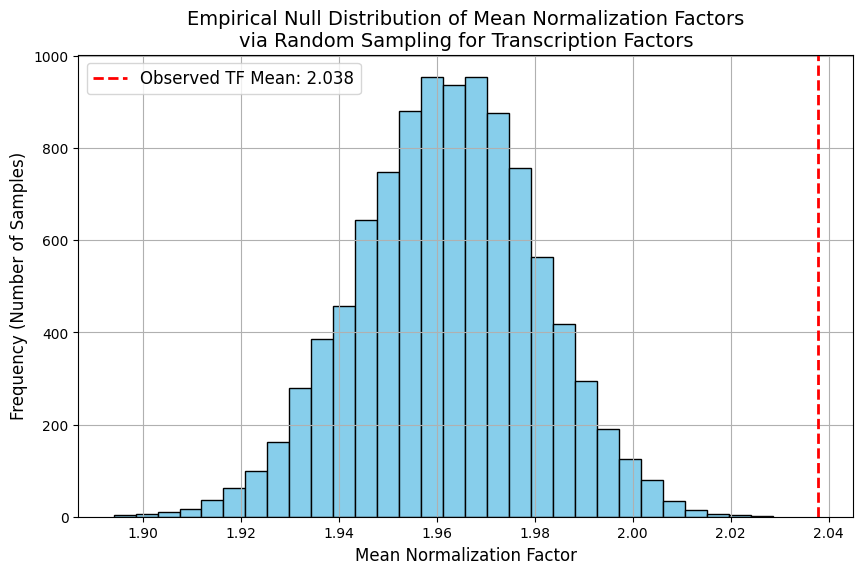

In [6]:
import random
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load normalization factors (dictionary: {gene_id: normalization_factor})
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/updated_yeast_median_dict.pkl", "rb") as f:
    gene_median_nonzero_dict = pickle.load(f)

# Load transcription factor (TF) gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/tf_genes.pkl", "rb") as f:
    tf_genes = pickle.load(f)

# Filter TF genes that exist in the normalization factors dictionary
tf_values = [gene_median_nonzero_dict[gene] for gene in tf_genes if gene in gene_median_nonzero_dict]
n = len(tf_values)

if n == 0:
    print("No transcription factor values found in the normalization factors dictionary.")
else:
    # Compute the observed mean for transcription factors
    observed_mean = np.mean(tf_values)
    
    # Set number of permutations
    mcmax = 9999
    mean_array = np.zeros(mcmax)
    all_genes = list(gene_median_nonzero_dict.keys())

    # Perform sampling and compute the mean for each random sample
    for i in range(mcmax):
        sampled_keys = random.sample(all_genes, n)
        sampled_values = [gene_median_nonzero_dict[k] for k in sampled_keys]
        mean_array[i] = np.mean(sampled_values)

    # Calculate the p-value (non-parametric)
    p_value = (np.sum(mean_array >= observed_mean) + 1) / (mcmax + 1)
    print(f"Observed mean for transcription factors: {observed_mean}")
    print(f"P-value: {p_value}")

    # Plot histogram of the permutation distribution and mark the observed mean
    plt.figure(figsize=(10, 6))
    plt.hist(mean_array, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(observed_mean, color='red', linestyle='dashed', linewidth=2,
                label=f'Observed TF Mean: {observed_mean:.3f}')
    plt.title('Empirical Null Distribution of Mean Normalization Factors\nvia Random Sampling for Transcription Factors', fontsize=14)
    plt.xlabel('Mean Normalization Factor', fontsize=12)
    plt.ylabel('Frequency (Number of Samples)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

Observed mean difference (HK - TF): 0.03009542749167382
P-value: 0.1664


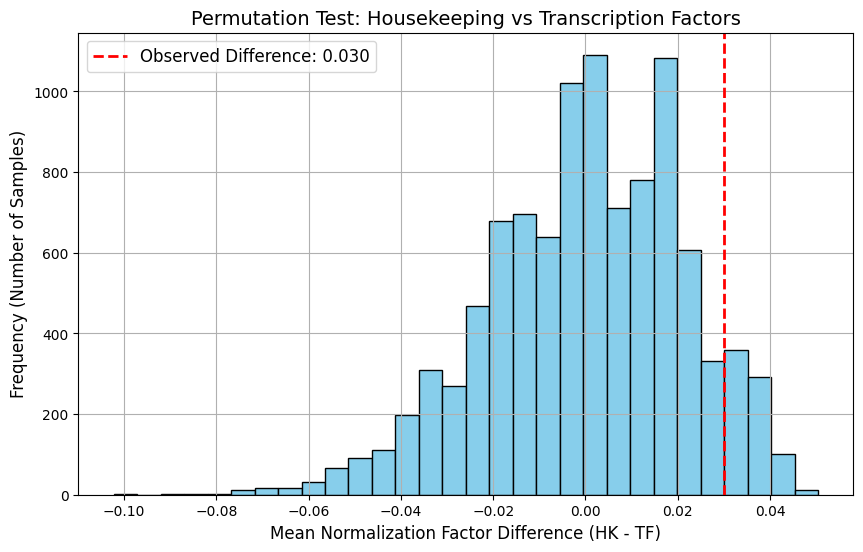

In [7]:
import random
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load normalization factors (dictionary: {gene_id: normalization_factor})
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/updated_yeast_median_dict.pkl", "rb") as f:
    gene_median_nonzero_dict = pickle.load(f)

# Load housekeeping gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/hk_genes.pkl", "rb") as f:
    housekeeping_genes = pickle.load(f)

# Load transcription factor (TF) gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/tf_genes.pkl", "rb") as f:
    tf_genes = pickle.load(f)

# Filter genes that exist in the normalization factors dictionary
hk_values = [gene_median_nonzero_dict[gene] for gene in housekeeping_genes if gene in gene_median_nonzero_dict]
tf_values = [gene_median_nonzero_dict[gene] for gene in tf_genes if gene in gene_median_nonzero_dict]

n_hk = len(hk_values)
n_tf = len(tf_values)

if n_hk == 0 or n_tf == 0:
    print("No valid housekeeping or transcription factor gene values found in the normalization factors dictionary.")
else:
    # Compute observed mean difference
    observed_diff = np.mean(hk_values) - np.mean(tf_values)
    
    # Set number of permutations
    mcmax = 9999
    diff_array = np.zeros(mcmax)
    combined_values = hk_values + tf_values

    # Perform permutation test
    for i in range(mcmax):
        random.shuffle(combined_values)
        perm_hk = combined_values[:n_hk]
        perm_tf = combined_values[n_hk:]
        diff_array[i] = np.mean(perm_hk) - np.mean(perm_tf)

    # Calculate p-value (two-tailed)
    p_value = (np.sum(np.abs(diff_array) >= np.abs(observed_diff)) + 1) / (mcmax + 1)
    print(f"Observed mean difference (HK - TF): {observed_diff}")
    print(f"P-value: {p_value}")

    # Plot histogram of the permutation distribution and mark the observed difference
    plt.figure(figsize=(10, 6))
    plt.hist(diff_array, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2,
                label=f'Observed Difference: {observed_diff:.3f}')
    plt.title('Permutation Test: Housekeeping vs Transcription Factors', fontsize=14)
    plt.xlabel('Mean Normalization Factor Difference (HK - TF)', fontsize=12)
    plt.ylabel('Frequency (Number of Samples)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


In [8]:
import numpy as np

# Compute standard deviations
std_hk = np.std(hk_values, ddof=1)  # Use ddof=1 for sample std
std_tf = np.std(tf_values, ddof=1)

# Compute pooled standard deviation
n_hk, n_tf = len(hk_values), len(tf_values)
s_pooled = np.sqrt(((n_hk - 1) * std_hk**2 + (n_tf - 1) * std_tf**2) / (n_hk + n_tf - 2))

# Compute Cohen’s d
cohen_d = (np.mean(hk_values) - np.mean(tf_values)) / s_pooled

print(f"Cohen's d: {cohen_d:.3f}")

Cohen's d: 0.323
